# Linear regression: training and test

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# load and investigate the data here:
df = pd.read_csv("utils/tennis_stats.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

In [4]:
df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


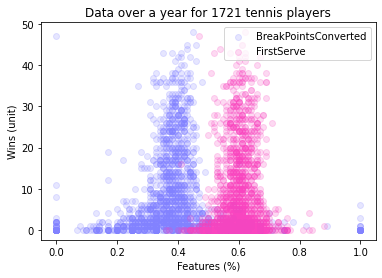

In [47]:
# perform exploratory analysis here:
# to pick random colors: c=np.random.rand(1721)
plt.scatter(df["BreakPointsConverted"], df["Wins"], color="#8282ff", alpha=0.2)
plt.scatter(df["FirstServe"], df["Wins"], color="#f945c0", alpha=0.2)
plt.legend(["BreakPointsConverted", "FirstServe"])
plt.xlabel("Features (%)")
plt.ylabel("Wins (unit)")
plt.title("Data over a year for 1721 tennis players")
plt.show()

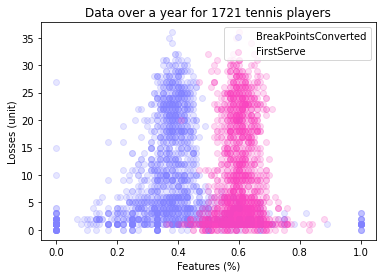

In [46]:
plt.scatter(df["BreakPointsConverted"], df["Losses"], color="#8282ff", alpha=0.2)
plt.scatter(df["FirstServe"], df["Losses"], color="#f945c0", alpha=0.2)
plt.legend(["BreakPointsConverted", "FirstServe"])
plt.xlabel("Features (%)")
plt.ylabel("Losses (unit)")
plt.title("Data over a year for 1721 tennis players")
plt.show()

Linear Regression score:  0.7586652454858861


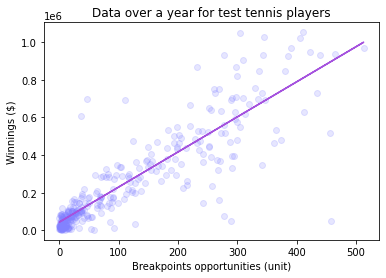

In [49]:
# perform single feature linear regressions here:
feature = df[["BreakPointsOpportunities"]].values.reshape(-1, 1)
outcome = df[["Winnings"]]
feature_train, feature_test, outcome_train, outcome_test = \
  train_test_split(feature, outcome, train_size = 0.8)

regr = LinearRegression()
regr.fit(feature_train, outcome_train)
print("Linear Regression score: ", regr.score(feature_test, outcome_test))
prediction = regr.predict(feature_test)

plt.scatter(feature_test, outcome_test, color="#8282ff", alpha=0.2)
plt.plot(feature_test, prediction, "#A552DE")
plt.xlabel("Breakpoints opportunities (unit)")
plt.ylabel("Winnings ($)")
plt.title("Data over a year for test tennis players")
plt.show()

Linear Regression score:  0.8355941183418255


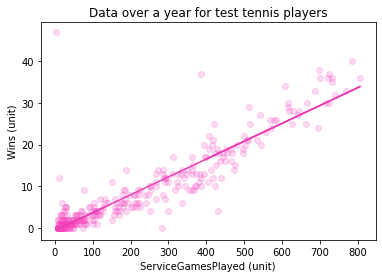

In [681]:
feature = df[["ServiceGamesPlayed"]].values.reshape(-1, 1)
outcome = df[["Wins"]]
feature_train, feature_test, outcome_train, outcome_test = \
  train_test_split(feature, outcome, train_size = 0.8)

regr = LinearRegression()
regr.fit(feature_train, outcome_train)
print("Linear Regression score: ", regr.score(feature_test, outcome_test))
prediction = regr.predict(feature_test)

plt.scatter(feature_test, outcome_test, color="#f945c0", alpha=0.2)
plt.plot(feature_test, prediction, "#e941b4")
plt.xlabel("ServiceGamesPlayed (unit)")
plt.ylabel("Wins (unit)")
plt.title("Data over a year for test tennis players")
plt.show()

In [289]:
# perform two feature linear regressions here:
features = df[["BreakPointsOpportunities", "ServiceGamesPlayed"]]
outcome = df[["Winnings"]]
features_train, features_test, outcome_train, outcome_test = \
  train_test_split(features, outcome, train_size = 0.8)

regr = LinearRegression()
regr.fit(features_train, outcome_train)
print("Linear Regression score: ", regr.score(features_test, outcome_test))

Linear Regression score:  0.8147035373005274


In [290]:
features = df[["BreakPointsOpportunities", "ReturnGamesPlayed"]]
outcome = df[["Winnings"]]
features_train, features_test, outcome_train, outcome_test = \
  train_test_split(features, outcome, train_size = 0.8)

regr = LinearRegression()
regr.fit(features_train, outcome_train)
print("Linear Regression score: ", regr.score(features_test, outcome_test))

Linear Regression score:  0.8423015176935379


In [551]:
# perform multiple feature linear regressions here:
features = df[["BreakPointsOpportunities", "BreakPointsFaced", "ServiceGamesPlayed", "ReturnGamesPlayed"]]
outcome = df[["Winnings"]]
features_train, features_test, outcome_train, outcome_test = \
  train_test_split(features, outcome, train_size = 0.8)

regr = LinearRegression()
regr.fit(features_train, outcome_train)
print("Linear Regression score: ", regr.score(features_test, outcome_test))

Linear Regression score:  0.8588023911521498


In [573]:
features = df[["Aces", "DoubleFaults", "ServiceGamesPlayed", "BreakPointsOpportunities"]]
outcome = df[["Winnings"]]
features_train, features_test, outcome_train, outcome_test = \
  train_test_split(features, outcome, train_size = 0.8)

regr = LinearRegression()
regr.fit(features_train, outcome_train)
print("Linear Regression score: ", regr.score(features_test, outcome_test))

Linear Regression score:  0.8698622973836927
